In [26]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, train_labels

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


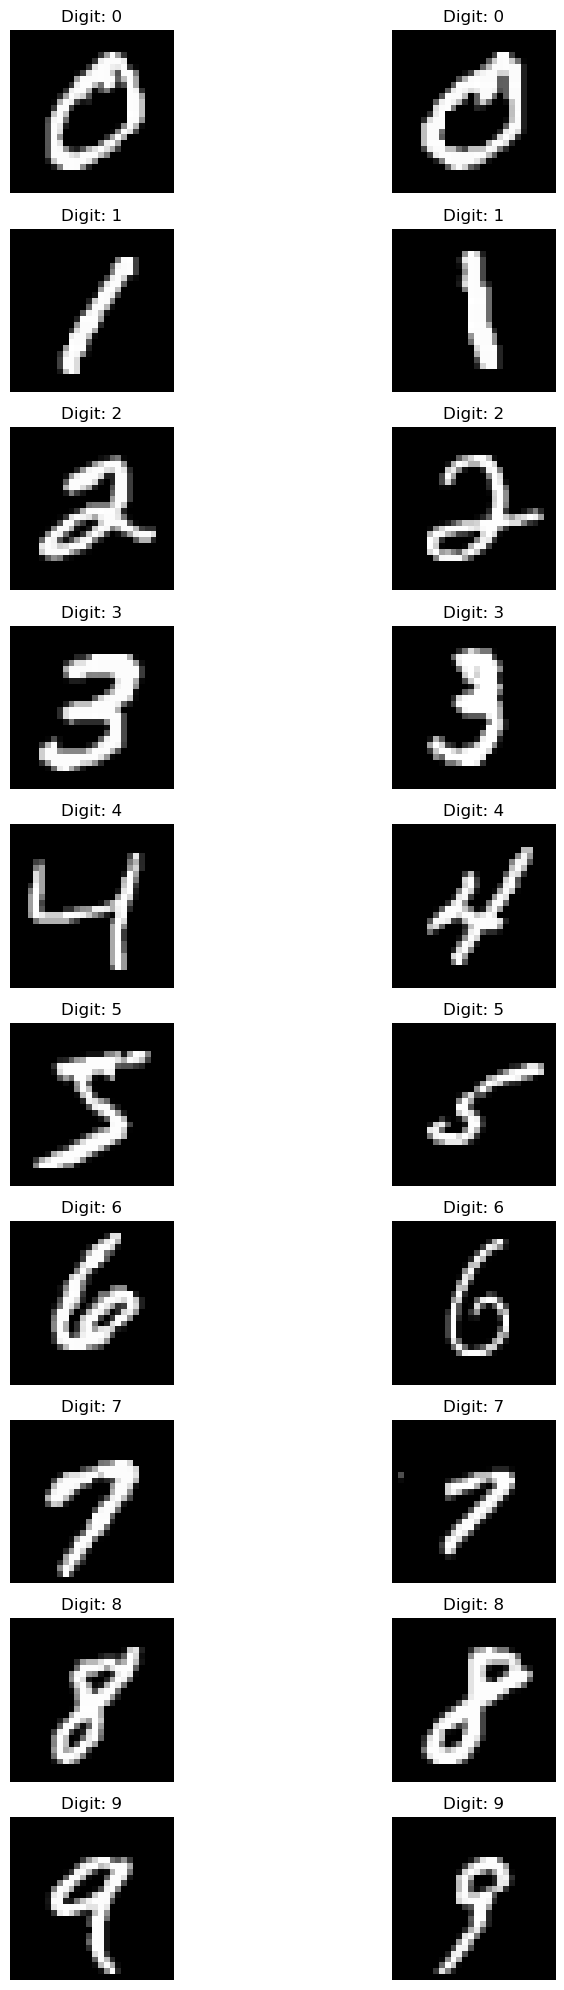

In [28]:
examples = {i: [] for i in range(10)}
countd = [2 for i in range(10)]

for image, digit in zip(train_images, train_labels):
    if not countd[digit]: continue

    examples[digit].append(image)
    countd[digit] -= 1

    if sum(countd) == 0: break

fig, axes = plt.subplots(10, 2, figsize=(10, 20))
for i in range(10):
    for j in range(2):
        axes[i, j].imshow(examples[i][j], cmap='gray')
        axes[i, j].set_title(f'Digit: {i}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [30]:
def fully_connected():
    fc = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    fc.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

    return fc

In [31]:
def convolutional_nn():
    cnn = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation='softmax')
    ])

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return cnn

In [32]:
fc = fully_connected()
cnn = convolutional_nn()

In [33]:
fc.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 1s 886us/step - loss: 0.2972 - accuracy: 0.9173
Epoch 2/5
938/938 [==============================] - 1s 849us/step - loss: 0.1364 - accuracy: 0.9603
Epoch 3/5
938/938 [==============================] - 1s 847us/step - loss: 0.0951 - accuracy: 0.9721
Epoch 4/5
938/938 [==============================] - 1s 877us/step - loss: 0.0722 - accuracy: 0.9784
Epoch 5/5
938/938 [==============================] - 1s 841us/step - loss: 0.0571 - accuracy: 0.9833


In [34]:
cnn.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 6ms/step - loss: 0.2651 - accuracy: 0.9278
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0954 - accuracy: 0.9728
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0707 - accuracy: 0.9799
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0586 - accuracy: 0.9829
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0498 - accuracy: 0.9850


In [35]:
fc_test_loss, fc_test_acc = fc.evaluate(test_images, test_labels, verbose=2)
cnn_test_loss, cnn_test_acc = cnn.evaluate(test_images, test_labels, verbose=2)

print()
print(f'FC Test accuracy: {fc_test_acc}')
print(f'CNN Test accuracy: {cnn_test_acc}')

313/313 - 0s - loss: 0.0813 - accuracy: 0.9745 - 160ms/epoch - 511us/step
313/313 - 1s - loss: 0.0545 - accuracy: 0.9819 - 505ms/epoch - 2ms/step

FC Test accuracy: 0.9745000004768372
CNN Test accuracy: 0.9818999767303467


In [36]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [45]:
def fully_connected():
    fc = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(.1),
        Dense(10, activation='softmax')
    ])

    fc.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

    return fc

In [46]:
def convolutional_nn(dropout_pos):
    layers = [Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
              MaxPooling2D(pool_size=(2, 2)),
              Flatten(),
              Dense(10, activation='softmax')]
    layers.insert(dropout_pos, Dropout(.1))
    
    cnn = Sequential(layers)

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return cnn

In [47]:
fc = fully_connected()
cnn1 = convolutional_nn(1)
cnn2 = convolutional_nn(2)

In [48]:
fc.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 1s 920us/step - loss: 0.3157 - accuracy: 0.9107
Epoch 2/5
938/938 [==============================] - 1s 868us/step - loss: 0.1479 - accuracy: 0.9569
Epoch 3/5
938/938 [==============================] - 1s 859us/step - loss: 0.1062 - accuracy: 0.9689
Epoch 4/5
938/938 [==============================] - 1s 820us/step - loss: 0.0850 - accuracy: 0.9743
Epoch 5/5
938/938 [==============================] - 1s 832us/step - loss: 0.0690 - accuracy: 0.9788


In [49]:
cnn1.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 9ms/step - loss: 0.2707 - accuracy: 0.9232
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0995 - accuracy: 0.9715
Epoch 3/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0724 - accuracy: 0.9794
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0605 - accuracy: 0.9819
Epoch 5/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0519 - accuracy: 0.9847


In [50]:
cnn2.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 7ms/step - loss: 0.2597 - accuracy: 0.9279
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0925 - accuracy: 0.9738
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0699 - accuracy: 0.9794
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0598 - accuracy: 0.9821
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0513 - accuracy: 0.9848


In [51]:
fc_test_loss, fc_test_acc = fc.evaluate(test_images, test_labels, verbose=2)
cnn1_test_loss, cnn1_test_acc = cnn1.evaluate(test_images, test_labels, verbose=2)
cnn2_test_loss, cnn2_test_acc = cnn2.evaluate(test_images, test_labels, verbose=2)

print()
print(f'FC Test accuracy: {fc_test_acc}')
print(f'CNN with Dropout after Conv Test accuracy: {cnn1_test_acc}')
print(f'CNN with Dropout after Pool Test accuracy: {cnn2_test_acc}')

313/313 - 0s - loss: 0.0749 - accuracy: 0.9763 - 160ms/epoch - 512us/step
313/313 - 0s - loss: 0.0509 - accuracy: 0.9832 - 485ms/epoch - 2ms/step
313/313 - 0s - loss: 0.0604 - accuracy: 0.9807 - 420ms/epoch - 1ms/step

FC Test accuracy: 0.9763000011444092
CNN with Dropout after Conv Test accuracy: 0.9832000136375427
CNN with Dropout after Pool Test accuracy: 0.9807000160217285


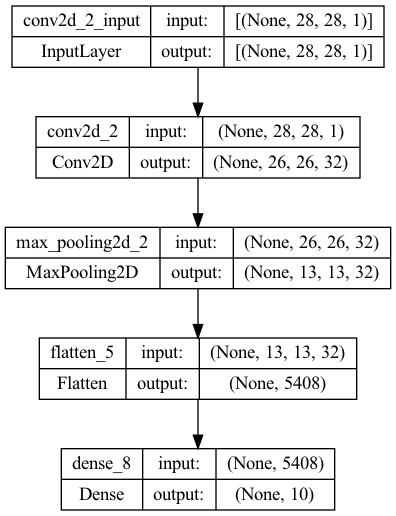

In [53]:
plot_model(cnn, to_file='best_model.png', show_shapes=True)